<a href="https://colab.research.google.com/github/ilmondovero/sf/blob/main/MSCI%20WORLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

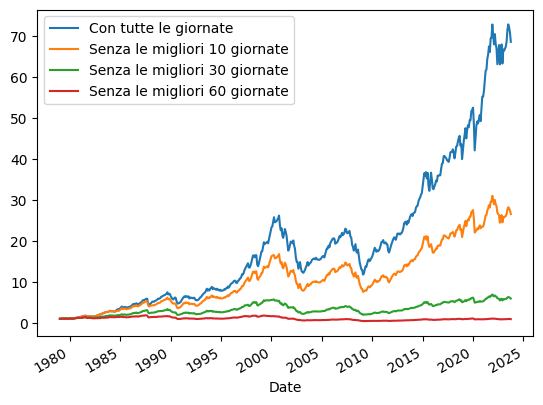

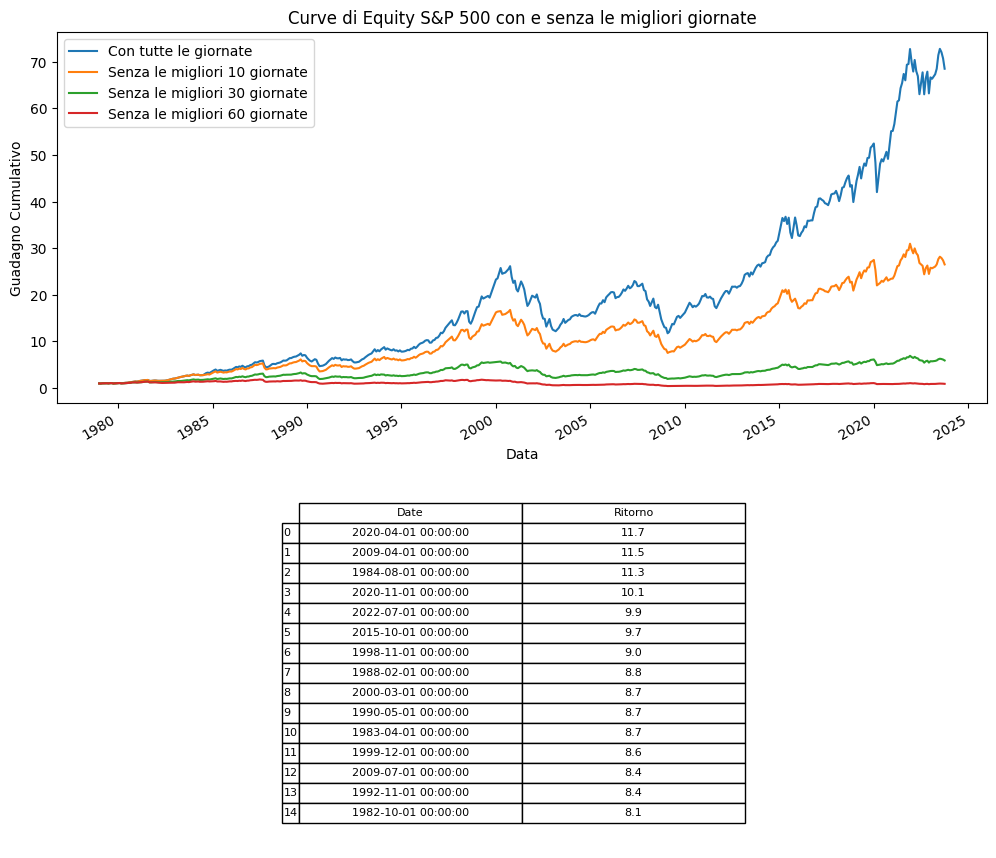

9.983725378561559

In [1]:
"""
Created on Fri Jun 11 10:03:30 2018
@author: Dario Marinelli
"""
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 19 12:48:18 2023

@author: ilmondovero
"""


import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# URL del file CSV da Google Sheets (si presume che i dati siano già stati caricati correttamente)
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTcKquIDepDpZk-2owdgsXqRl5rAyFvLBwRkLEYfLRVYB-K9AyEQwMIvDfQOFVa38gxP7g41XWrcJg0/pub?gid=0&single=true&output=csv"

# Legge il DataFrame dal link
data = pd.read_csv(url, index_col='Date', decimal=',', parse_dates=True)

# Calcola i rendimenti giornalieri
data['Ritorno'] = data['MSCI World'].pct_change()

# Calcola le migliori 120 giornate di rendimento
migliori_120_giornate = data['Ritorno'].nlargest(120).mul(100).round(1)

# Funzione per calcolare la curva di equity escludendo le migliori giornate
def equity_curve_senza_migliori(giorni_esclusi):
    rendimenti_senza_migliori = data['Ritorno'].drop(migliori_120_giornate.index[:giorni_esclusi])
    return (rendimenti_senza_migliori + 1).cumprod()

# Prepara un DataFrame per contenere tutte le curve di equity
df_equity = pd.DataFrame()
df_equity['Con tutte le giornate'] = (data['Ritorno'] + 1).cumprod()

# Aggiungi le curve di equity per ogni scenario
for giorni in [10, 30, 60]:
    df_equity[f'Senza le migliori {giorni} giornate'] = equity_curve_senza_migliori(giorni)

# Plotta tutte le curve di equity
df_equity.dropna(inplace=True)
df_equity = (df_equity / df_equity.iloc[0]) * 1
df_equity.plot()
# Crea una figura con due subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Grafico delle curve di equity nel primo subplot
df_equity.plot(ax=ax1, title='Curve di Equity S&P 500 con e senza le migliori giornate')
ax1.set_xlabel('Data')
ax1.set_ylabel('Guadagno Cumulativo')
ax1.legend(loc='upper left')

# Tabella delle migliori 120 giornate nel secondo subplot
ax2.axis('off')  # Nascondi gli assi per la tabella
tbl = table(ax2, migliori_120_giornate.head(15).reset_index(), loc='center', cellLoc='center', colWidths=[0.2, 0.2])
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1.2, 1.2)
plt.show()

# Calcola il rendimento complessivo
rendimento_totale = data['MSCI World'].iloc[-1] / data['MSCI World'].iloc[0] - 1

# Calcola il numero di anni coperti dai dati
anni = (data.index[-1] - data.index[0]).days / 365.25

# Calcola la media annuale composta
media_annuale_compound = (1 + rendimento_totale) ** (1/anni) - 1
# Calcola il massimo cumulativo fino a quel momento
max_cumulative = data['MSCI World'].expanding().max()

# Calcola il drawdown
drawdown = (data['MSCI World'] - max_cumulative)/max_cumulative

# Calcola il massimo drawdown
max_drawdown = drawdown.min()

max_drawdown*100
media_annuale_compound*100